# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


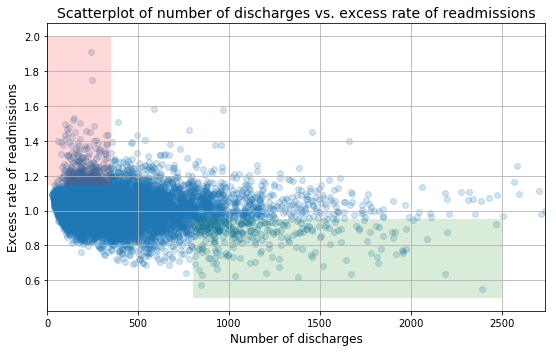

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
\<div class="span5 alert alert-info">
<div class="alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
#</div>
****

In [5]:
# Your turn

# A. Do you agree with the above analysis and recommendations? Why or why not?


**A. Initial observations based on the plot above**

#### Claim: "Overall, rate of readmissions is trending down with increasing number of discharges"
+ Although this claim is true and statisically significant, the relationship between the Excess Readmission Ratio and Number of Discharges is not of practical significance.  We demonstrate this in our analysis below.

#### Claim: "With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)"
+ The mean excess readmission rate in the the red area is neither statistically nor practically different from the mean excess readmission rate in the the non-red area. We demonstrate this in our analysis below.

#### Claim: "With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)"
+ The mean excess readmission rate in the the green area is neither statistically nor practically different from the mean excess readmission rate in the the non-green area. We demonstrate this in our analysis below.


**B. Statistics**

#### Claim: "In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1"
+ The 99 percent confidence interval for the mean excess readmission rate in hospitals/facilities with number of discharges < 100 is $(0.9982,  1.0028)$. Their point estimate of 1.023 is wrong.  We calculated a point estimate of 1.009.

+ The 99 percent confidence interval for the percentage of hospitals/facilities with number of discharges < 100 that have have excess readmission rate greater than 1 is $(45.7\%,  47.7\%)$. Their point estimate of 63% is wrong.  We calculated a point estimate of 51.1%.

#### Claim: "In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1"
+ The 99 percent confidence interval for the mean excess readmission rate in hospitals/facilities with number of discharges > 1000 is $(0.9954,  1.0010)$. Their point estimate of 0.978 is wrong.  We calculated a point estimate of 1.011.

+ The 99 percent confidence interval for the percentage of hospitals/facilities with number of discharges > 1000 that have have excess readmission rate greater than 1 is $(46.6\%,  49.1\%)$. Their point estimate of 44% is wrong.  We calculated a point estimate of 54.6%.


**C. Conclusions**

#### **Claim**: "There is a significant [negative] correlation between hospital capacity (number of discharges) and readmission rates."
+ The actual observed correlation coefficient is 0.0047. There not a significant negative correlation between hospital capacity (number of discharges) and readmission rates. We demonstrate this in our analysis below.


#### **Claim**: "Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions."
+ This may be true, but it is not possible to confirm the claim with the data provided.


**D. Regulatory policy recommendations**

#### **Claim**: "Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation."
+ This is a terrible policy recommendation for several reasons:



1. This policy would artificially restrict the supply of healthcare providers and consequently increase the cost of healthcare services.

2. This policy would lead to discontinuing operation of many hospitals/facilties in areas with low population density. Consequently, people in areas with low population density would have to travel farther to get healthcare services. This could have fatal consequences when someone is in *urgent* need of care.

3. The policy would especially hurt areas that had both low population density and low-income, since hospitals/facilties in these areas would be less likely to have the financial wherewithal to invest in the mandated "upgraded resource allocations for quality care."

4. This policy would give consumers fewer choices of healthcare providers.


#### **Claim**: "Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges."
+ This is a terrible policy recommendation for the same reasons as those mentioned directly above.

## Import dependencies

In [6]:
from scipy import stats
from matplotlib import collections  as mc

## Data preparation

In [7]:
# Filter out samples where 'Number of Discharges' and
# 'Excess Readmission Ratio' are not null.
                                      
nod_not_null = clean_hospital_read_df['Number of Discharges'].notnull()
err_not_null = clean_hospital_read_df['Excess Readmission Ratio'].notnull()

clean_hospital_read_df = clean_hospital_read_df[nod_not_null &
                                                err_not_null]

# Create new DataFrame with only features of interest.
df = clean_hospital_read_df[['Number of Discharges',  
                             'Excess Readmission Ratio']]

# Relabel columns in the new DataFrame.
col_name_dict = {'Number of Discharges': 'nod', 
                 'Excess Readmission Ratio': 'err'}
df = df.rename(columns=col_name_dict)

# prune largest 3 outliers along x axis.
df = df[df.nod < df.nod.nlargest(3).min()]

## Set Alpha
Set $\alpha$ = .01 for statistical significance reporting.

In [8]:
alpha = .01

## Test Claims

### **Claim**: "Overall, rate of readmissions is trending down with increasing number of discharges"

We check this claim by conducting a hypothesis test where:

+ **Null Hypothesis $H_0$**: $\beta < 0$, where $\beta$ is the slope coefficient from regressing Excess Readmission Ratio against Number of Discharges.
+ **Alternative Hypothesis $H_0$**: $\beta \geq 0$

We use bootstrapping to test this hypothesis.

In [9]:
# Define a function that will bootstrap iters=1000 samples 
# from the DataFrame and return 3 numpy arrays containing
# the (1) regression slopes, (2) regression intercepts, and 
# (3) correlation coefficients form the bootstrapped samples 

def reg_sampling_distribution(n=len(df), iters=10000):
    slopes = []
    intercepts = []
    corr_coefs = []
    for i in range(iters):
        df_resampled = df.sample(len(df), replace=True)
        
        slope, intercept, r_value, p_value, std_err = \
            stats.linregress(df_resampled.nod,
                             df_resampled.err)
        slopes.append(slope)
        intercepts.append(intercept)
        corr_coefs.append(r_value)
    return np.array(slopes), np.array(intercepts), np.array(corr_coefs)

In [10]:
# Use reg_sampling_distribution to generate 
# sampling distributions for the (1) regression slopes, 
# (2) regression intercepts, and (3) correlation coefficients

slope_sampling, intercept_sampling, corr_coef_sampling = \
    reg_sampling_distribution(n=len(df), iters=10000)

Calculate the number of samples with regression slopes greater than 0

In [11]:
p_value = len(slope_sampling[slope_sampling > 0 ]) / len(slope_sampling)

print('Observed p-value = ', p_value)

Observed p-value =  0.0


None of the 10,000 bootstrapped samples had positive regression slopes. We cannot reject the null hypothesis $H_0$ that $\beta < 0$.

The null hypothesis $H_0$ that $\beta < 0$ is statisically significant at the significance level $\alpha$ = .01.

Although the null hypothesis $H_0$ that $\beta < 0$ is statisically significant, the relationship between the Excess Readmission Ratio and Number of Discharges is not of practical significance.

In [12]:
# Calculate the linear regression parameters from the data

x = df.nod
y = df.err

slope_actual, intercept_actual, \
    r_value_actual, p_value_actual, \
    std_err_actual = stats.linregress(x,y)

In [13]:
incremental_number_of_discharges = 100
slope_actual * incremental_number_of_discharges

-0.0028565052943822621

All else equal, if the number of discharges were  incrementally increased by 100 discharges, the predicted excess readmission ratio would decrease by about 0.003.

As the number of discharges increases from 25 to 2740, the predicted excess readmission ratio would decrease from about 1.0172 to 0.9397 (dropping by about 0.0776).  This small change in excess readmission ratio  is immaterial.

We demonstrate this below.

In [14]:
def line_enpoints(slope, intercept, x_array):
    x_min, x_max = np.min(x), np.max(x)
    y_0 = slope * x_min + intercept
    y_1 = slope * x_max + intercept
    
    x_vals = np.array([x_min, x_max])
    y_vals = np.array([y_0, y_1])
    
    return x_vals, y_vals

In [15]:
regline = line_enpoints(slope_actual, intercept_actual, x)

In [16]:
print('x_min = ', regline[0][0])
print('x_max = ', regline[0][1])
print('x span = ', regline[0][1] - regline[0][0])
print()
print('predicted y_min = ', regline[1].min())
print('predicted y_max = ', regline[1].max())
print('predicted y span = ', regline[1].max() - regline[1].min())

x_min =  25
x_max =  2740
x span =  2715

predicted y_min =  0.939679312888
predicted y_max =  1.01723343163
predicted y span =  0.0775541187425


Next, we create a scatterplot of number of discharges vs. excess rate of readmissions.  This plot will show all of the bootstrapped regression lines.

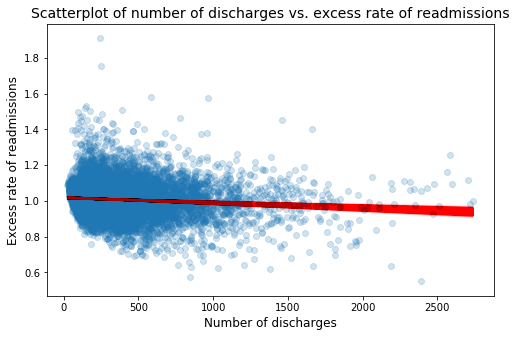

In [17]:
# Plot the figure

x = df.nod
y = df.err

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions',
             fontsize=14)

# plot bootstrapped regression lines
output = line_enpoints(slope_sampling, intercept_sampling, x)

lines = [[(output[0][0], y_0), 
          (output[0][1], y_1)] for y_0, y_1 in zip(output[1][0], 
                                                   output[1][1])]

lc = mc.LineCollection(lines, color='r', lw=2, alpha= 0.01)
ax.add_collection(lc)

### Framing the problem as a logistic regression

Next, we frame the problem as a logistic regression.  We define the response variable $y$ such that $y=1$ if the excess rate of readmissions is greater than zero, and $y=0$ otherwise.  We define the predictor variable $X$ as the number of discharges.

In [18]:
# Import from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Prepare data

df_lr = df.copy()

def create_binary_y(x):
    if x > 1:
        y = 1
    else:
        y = 0
    return y

df_lr['y'] = df.err.apply(create_binary_y)

X = df_lr.nod.values
y = df_lr.y.values

# Here you have 1 "feature" and 1 "target", hence the 
# expected shape of the input would be (n_samples,1)
X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Fit the model

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
print("Logistic regression coefficient:",
      "{:f}".format(logreg.coef_[0,0]))

Logistic regression coefficient: -0.000390


In [20]:
print('Train accuracy',
      accuracy_score(y_train, logreg.predict(X_train)))

print('Test accuracy',
      accuracy_score(y_test, logreg.predict(X_test)))

print('Train ROC AUC score',
      roc_auc_score(y_train, logreg.predict(X_train)))

print('Test ROC AUC score',
      roc_auc_score(y_test, logreg.predict(X_test)))

Train accuracy 0.523636363636
Test accuracy 0.518186610438
Train ROC AUC score 0.515398155133
Test ROC AUC score 0.506200088632


The train accuracy, test accuracy, train ROC AUC score, and test ROC AUC score for the logistic regression are all close to 0.5, demonstrating that the number of discharges has little bearing on whether or not the excess rate of readmissions is greater than one.

### **Claim**: "With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)"

The red shaded area ranges from 0 to 350 along the x-axis (number of discharges).  

Let us partition the DataFrame df into the following two subsets:

    df_red = df[df.nod <= 350]
    df_not_red = df[df.nod > 350]
    
We check the claim with the following hypothesis test:

+ **Null Hypothesis $H_0$**: The mean excess rate of readmissions for df_red is different than the mean excess rate of readmissions for df_not_red.
+ **Alternative Hypothesis $H_0$**: The mean excess rate of readmissions for df_red is the same as than the mean excess rate of readmissions for df_not_red.

We use bootstrapping to test this hypothesis.

In [21]:
# Define df_red and df_not_red
df_red = df[df.nod <= 350]
df_not_red = df[df.nod > 350]

In [22]:
print("Mean excess rate of readmissions for df_red:")
print(df_red.err.mean())
print()
print("Mean excess rate of readmissions for df_not_red:")
print(df_not_red.err.mean())
print()
print("df_red.err.mean() - df_not_red.err.mean() :")
print(df_red.err.mean() - df_not_red.err.mean())
print()
print("df_red.err.mean() > df_not_red.err.mean() :")
print(df_red.err.mean() > df_not_red.err.mean())

Mean excess rate of readmissions for df_red:
1.0132787273505486

Mean excess rate of readmissions for df_not_red:
0.9985740691192894

df_red.err.mean() - df_not_red.err.mean() :
0.014704658231259216

df_red.err.mean() > df_not_red.err.mean() :
True


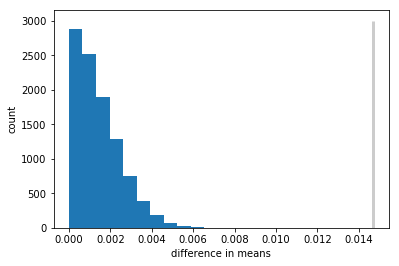

In [23]:
n = len(df_red.err)
pool = df.err.values

def TestStatistic(data):
    group1, group2 = data
#    test_stat = abs(group1.mean() - group2.mean())
    test_stat = abs(group1.mean() - group2.mean())
    return test_stat

def RunModel():
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data

test_stats = np.array([TestStatistic(RunModel()) for i in range(10000)])


actual = TestStatistic((df_red.err.values, df_not_red.err.values))
actual

plt.vlines(actual, 0, 3000, linewidth=3, color='0.8')
plt.hist(test_stats)
plt.xlabel('difference in means')
plt.ylabel('count')

In [24]:
sum(test_stats > actual) / 10000

0.0

50% of the 10,000 bootstrapped samples had a difference in means as large as the observed difference in means. We cannot the null hypothesis $H_0$.

The observed difference in means is only 0.0147.  A 0.0147 difference in mean excess readmission ratio is not of practical significance.

### **Claim**: "With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)"

The green shaded area ranges from 800 to 2500 along the x-axis (number of discharges).  

Let us partition the DataFrame df into the following two subsets:

    df_green = df[df.nod < 800]
    df_not_green = df[df.nod >= 800]
    
We check the claim with the following hypothesis test:

+ **Null Hypothesis $H_0$**: The mean excess rate of readmissions for df_green is different than the mean excess rate of readmissions for df_not_green.
+ **Alternative Hypothesis $H_0$**: The mean excess rate of readmissions for df_green is the same as than the mean excess rate of readmissions for df_not_green.

We use bootstrapping to test this hypothesis.

In [25]:
# Define df_green and df_not_green
df_green = df[df.nod >= 800]
df_not_green = df[df.nod < 800]

In [26]:
print("Mean excess rate of readmissions for df_green:")
print(df_green.err.mean())
print()
print("Mean excess rate of readmissions for df_not_green:")
print(df_not_green.err.mean())
print()
print("df_green.err.mean() - df_not_green.err.mean():")
print(df_green.err.mean() - df_not_green.err.mean())
print()
print("df_green.err.mean() < df_not_green.err.mean() :")
print(df_green.err.mean() < df_not_green.err.mean())

Mean excess rate of readmissions for df_green:
1.0057054444444453

Mean excess rate of readmissions for df_not_green:
1.0076968472720413

df_green.err.mean() - df_not_green.err.mean():
-0.0019914028275960227

df_green.err.mean() < df_not_green.err.mean() :
True


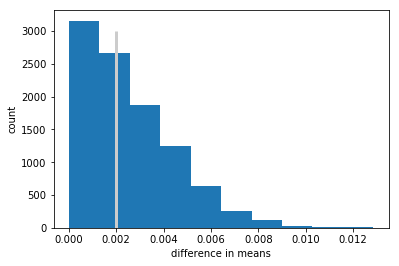

In [27]:
n = len(df_green.err)
pool = df.err.values

def TestStatistic(data):
    group1, group2 = data
#    test_stat = abs(group1.mean() - group2.mean())
    test_stat = abs(group1.mean() - group2.mean())
    return test_stat

def RunModel():
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data

test_stats = np.array([TestStatistic(RunModel()) for i in range(10000)])


actual = TestStatistic((df_green.err.values, df_not_green.err.values))
actual

plt.vlines(actual, 0, 3000, linewidth=3, color='0.8')
plt.hist(test_stats)
plt.xlabel('difference in means')
plt.ylabel('count')

In [28]:
sum(test_stats <= actual) / 10000

0.47449999999999998

60% of the 10,000 bootstrapped samples had a difference in means as large as the observed difference in means. We the null hypothesis $H_0$.

The observed difference in means is only 0.0147.  A 0.0147 difference in mean excess readmission ratio is not of practical significance.

### **Claim**: "In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1"

Instead of simply reporting point estimates of the mean excess readmission rate and the percentage of hospitals/facilities that have have excess readmission rate greater than 1, we should also report confidence intervals around those point estimates.

We use bootstrapping to establish confidence intervals around:
+ The mean excess readmission rate in hospitals/facilities with number of discharges < 100.
+ The percentage of hospitals/facilities with number of discharges < 100 that have have excess readmission rate greater than 1.

In [29]:
# Define a function that will bootstrap iters=10000 samples 
# from the DataFrame and return 2 numpy arrays containing
# the (1) the mean errors of the bootstrapped samples and
# (2) the proportion of excess readmission rates greater than 1
# from  the bootstrapped samples 

def new_sampling_distribution(df, n=len(df), iters=10000):
    
    mean_errs = []
    err_gt1s = []
    for i in range(iters):
        df_resampled = df.sample(len(df), replace=True)
        
        mean_err = df_resampled.err.mean()
#        err_gt1 = len(df_resampled[df_resampled.err > 1]) / n
        err_gt1 = sum(df_resampled.err > 1) / n

        mean_errs.append(mean_err)
        err_gt1s.append(err_gt1)
    return np.array(mean_errs), np.array(err_gt1s)

In [30]:
# Create a subset of the data where the number of discharges < 100
df_nod_lt100 = df[df.nod < 100]

In [31]:
# Use new_sampling_distribution on the subset of the data 
# where the number of discharges < 100 to generate 
# (1) the mean errors of the bootstrapped samples and
# (2) the proportion of excess readmission rates greater than 1
# from the bootstrapped samples 

mean_errs_lt100, err_gt1s_lt100 = \
    new_sampling_distribution(df_nod_lt100, 
                              n=len(df_nod_lt100), 
                              iters=10000)

In [32]:
# Define our the lower bound (lb) and upper bound (ub) for our
# confidence intervals with alpha = 0.01
confidence_lb = 0 + (alpha / 2)
confidence_ub = 1 - (alpha / 2)
print(1-alpha)
print(confidence_lb)
print(confidence_ub)

0.99
0.005
0.995


In [33]:
np.percentile(mean_errs_lt100, [confidence_lb, confidence_ub])

array([ 0.99338496,  0.99683651])

In [34]:
np.percentile(err_gt1s_lt100, [confidence_lb, confidence_ub])

array([ 0.43602685,  0.45622896])

In [35]:
df_nod_lt100.err.mean()

1.0030394781144791

In [36]:
sum(df_nod_lt100.err > 1) /  len(df_nod_lt100.err)

0.48989898989898989

The 99 percent confidence interval for the mean excess readmission rate in hospitals/facilities with number of discharges < 100 is $(0.9982,  1.0028)$. Their point estimate of 1.023 is wrong.  We calculated a point estimate of 1.009.

The 99 percent confidence interval for the percentage of hospitals/facilities with number of discharges < 100 that have have excess readmission rate greater than 1 is $(45.7\%,  47.7\%)$.
Their point estimate of 63% is wrong.  We calculated a point estimate of 51.1%.

### Two-tailed bootstrap hypothesis test for population mean

$H_0: \mu = 1.023$

$H_1: \mu \neq 1.023$

In [37]:
mean_errs_lt100.max()

1.0134959595959607

Since the maximum of the 10,000 bootstrapped sample means is less than 1.023, we reject the null hypothesis

### Bootstrap hypothesis test for the population proportion

$H_0: x = 0.63$

$H_1: x \neq 0.63$

In [38]:
err_gt1s_lt100.max()

0.53872053872053871

Since the maximum of the 10,000 bootstrapped sample proportions is less than 0.63, we reject the null hypothesis.

### **Claim**: "In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1"

Instead of simply reporting point estimates of the mean excess readmission rate and the percentage of hospitals/facilities that have have excess readmission rate greater than 1, we should also report confidence intervals around those point estimates.

We use bootstrapping to establish confidence intervals around:
+ The mean excess readmission rate in hospitals/facilities with number of discharges > 1000.
+ The percentage of hospitals/facilities with number of discharges > 1000 that have have excess readmission rate greater than 1.

In [39]:
# Create a subset of the data where the number of discharges > 1000
df_nod_gt1000 = df[df.nod > 1000]

In [40]:
# Use new_sampling_distribution on the subset of the data 
# where the number of discharges > 1000 to generate 
# (1) the mean errors of the bootstrapped samples and
# (2) the proportion of excess readmission rates greater than 1
# from the bootstrapped samples 

mean_errs_gt1000, err_gt1s_gt1000 = \
    new_sampling_distribution(df_nod_gt1000, 
                              n=len(df_nod_gt1000), 
                              iters=10000)

In [41]:
np.percentile(mean_errs_gt1000, [confidence_lb, confidence_ub])

array([ 0.98234684,  0.98948499])

In [42]:
np.percentile(err_gt1s_gt1000, [confidence_lb, confidence_ub])

array([ 0.37282576,  0.40869565])

In [43]:
df_nod_gt1000.err.mean()

0.9993339130434783

In [44]:
sum(df_nod_gt1000.err > 1) /  len(df_nod_gt1000.err)

0.46304347826086956

The 99 percent confidence interval for the mean excess readmission rate in hospitals/facilities with number of discharges > 1000 is $(0.9954,  1.0010)$. Their point estimate of 0.978 is wrong.  We calculated a point estimate of 1.011.

The 99 percent confidence interval for the percentage of hospitals/facilities with number of discharges > 1000 that have have excess readmission rate greater than 1 is $(46.6\%,  49.1\%)$. Their point estimate of 44% is wrong.  We calculated a point estimate of 54.6%.

### Two-tailed bootstrap hypothesis test for population mean

$H_0: \mu = 0.978 $

$H_1: \mu \neq 0.978$

In [45]:
mean_errs_gt1000.min()

0.98225673913043399

Since the minimum of the 10,000 bootstrapped sample means is less than 0.978, we reject the null hypothesis.

### Bootstrap hypothesis test for the population proportion

$H_0: x = 0.44$

$H_1: x \neq 0.44$

In [46]:
np.percentile(err_gt1s_gt1000, [confidence_lb, confidence_ub])

array([ 0.37282576,  0.40869565])

Since 0.44 is above the 99% confidence interval, we reject the null hypothesis.

### **Claim**: "There is a significant [negative] correlation between hospital capacity (number of discharges) and readmission rates."

Let $\rho$ be the correlation coefficient between the number of discharges and excess readmission rates.

We check this claim by conducting a hypothesis test where:

+ **Null Hypothesis $H_0$**: $\rho < 0$. 

+ **Alternative Hypothesis $H_0$**: $\rho \nless 0$. 

We use bootstrapping to test this hypothesis.

In [47]:
# Calculate the correlation coefficient from the data

x = df.nod
y = df.err

slope_actual, intercept_actual, \
    r_value_actual, p_value_actual, \
    std_err_actual = stats.linregress(x,y)

# correlation coefficient :
r_value_actual

-0.0074369453349740124

In [48]:
# Use reg_sampling_distribution to generate 
# sampling distributions for the (1) regression slopes, 
# (2) regression intercepts, and (3) correlation coefficients

slope_sampling, intercept_sampling, corr_coef_sampling = \
    reg_sampling_distribution(n=len(df), iters=10000)

Calculate the number of samples with correlation coefficients less than 0.

In [49]:
p_value = len(corr_coef_sampling[corr_coef_sampling < 0 ]) / len(corr_coef_sampling)
print('Observed p-value = ', p_value)

Observed p-value =  0.7913


In [50]:
corr_coef_sampling

array([-0.01569563, -0.01507021, -0.00938455, ..., -0.00696272,
       -0.00588328, -0.02322161])

The actual observed correlation coefficient is 0.0047.  There not a significant negative correlation between hospital capacity (number of discharges) and readmission rates.

Another way to visualize the data is to create ECDFs for the excess readmission rate of different subsets of the data.

In [51]:
from statsmodels.distributions.empirical_distribution import ECDF

domain = np.linspace(0.5, 2.0, 151)

ecdf_all = ECDF(df.err)(domain)

ecdf_lt100 = ECDF(df[df.nod < 100].err)(domain)
ecdf_gt100 = ECDF(df[df.nod > 100].err)(domain)

ecdf_lt300 = ECDF(df[df.nod < 300].err)(domain)
ecdf_gt300 = ECDF(df[df.nod > 300].err)(domain)

ecdf_lt1000 = ECDF(df[df.nod < 1000].err)(domain)
ecdf_gt1000 = ECDF(df[df.nod > 1000].err)(domain)

ecdf_dict = {'domain': domain,
             'ecdf_all' : ecdf_all, 
             'ecdf_lt100' : ecdf_lt100,
             'ecdf_gt100' : ecdf_gt100, 
             'ecdf_lt300' : ecdf_lt300, 
             'ecdf_gt300' : ecdf_gt300, 
             'ecdf_lt1000' : ecdf_lt1000, 
             'ecdf_gt1000' : ecdf_gt1000}

df_ecdf = pd.DataFrame(ecdf_dict, index=ecdf_dict['domain'])
df_ecdf.drop(['domain'], axis=1, inplace=True)

(0.8, 1.2)

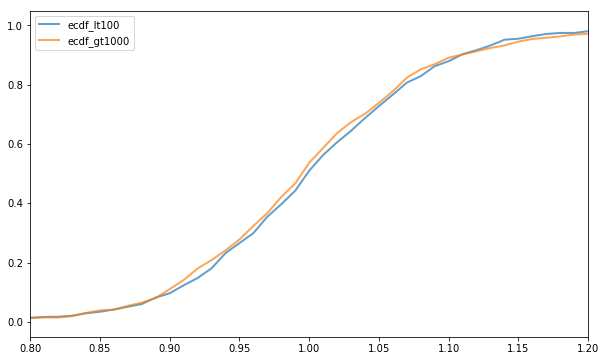

In [52]:
# Graph the ECDFs for the subsets where:
# 1. number of discharges < 100, and
# 2. number of discharges > 1000.
df_ecdf.plot(y=['ecdf_lt100', 'ecdf_gt1000'], alpha=0.7,
             linewidth=2, figsize=(10, 6))
plt.xlim([0.8, 1.2])

These two ECDFs look almost indistinguishable.

(0.8, 1.2)

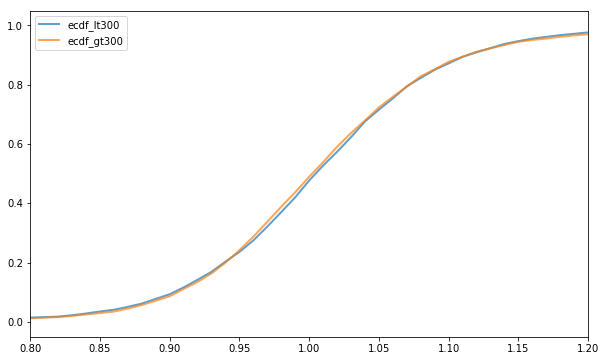

In [53]:
# Graph the ECDFs for the subsets where:
# 1. number of discharges < 300, and
# 2. number of discharges > 300.
df_ecdf.plot(y=['ecdf_lt300', 'ecdf_gt300'], alpha=0.7,
             linewidth=2, figsize=(10, 6))
plt.xlim([0.8, 1.2])

These two ECDFs look almost indistinguishable.

(0.8, 1.2)

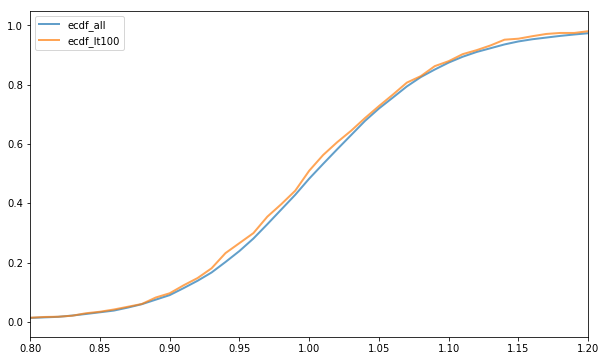

In [54]:
# Graph the ECDFs for the subsets where:
# 1. number of discharges < 300, and
# 2. we include the entire dataset.
df_ecdf.plot(y=['ecdf_all', 'ecdf_lt100'], alpha=0.7,
             linewidth=2, figsize=(10, 6))
plt.xlim([0.8, 1.2])

These two ECDFs look almost indistinguishable.

(0.8, 1.2)

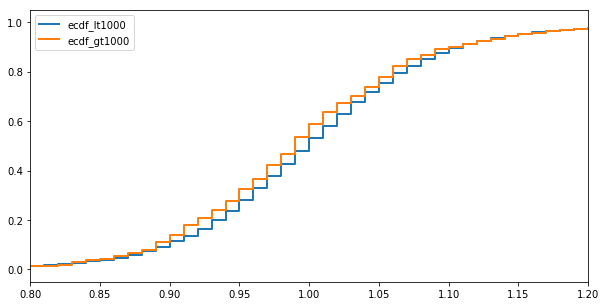

In [55]:

df_ecdf.plot(y=['ecdf_lt1000', 'ecdf_gt1000'],
             drawstyle="steps-pre", 
             linewidth=2, figsize=(10, 5))
plt.xlim([0.8, 1.2])